Se implementa un modelo de Machine Learning en el que se busque predecir el costo del viaje sobre la base de la duración del viaje, calculada entre la hora de inicio y de fin, y la distancia del mismo.

Para iniciar, se importan las librerias necesarias y se cargan los datasets con los datos necesarios para poder calcular el costo

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('Datasets/airports_yellow_taxi_trips(5.2024).csv')
df2 = pd.read_csv('Datasets/airports_yellow_taxi_trips(6.2024).csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79958 entries, 0 to 79957
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   79958 non-null  object 
 1   tpep_dropoff_datetime  79958 non-null  object 
 2   passenger_count        79958 non-null  float64
 3   trip_distance          79958 non-null  float64
 4   RatecodeID             79958 non-null  float64
 5   PULocationID           79958 non-null  int64  
 6   DOLocationID           79958 non-null  int64  
 7   payment_type           79958 non-null  int64  
 8   fare_amount            79958 non-null  float64
 9   total_amount           79958 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 6.1+ MB


In [4]:
df1.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
0,2024-05-01 00:10:15,2024-05-01 00:51:21,2.0,19.36,1.0,132,89,1,76.5,86.75
1,2024-05-01 00:07:12,2024-05-01 00:40:16,2.0,14.11,1.0,132,7,1,56.9,67.15
2,2024-05-01 00:05:05,2024-05-01 00:36:56,2.0,18.48,2.0,132,262,1,70.0,99.23
3,2024-05-01 00:25:39,2024-05-01 00:44:54,3.0,6.54,1.0,132,216,1,27.5,31.75
4,2024-05-01 00:14:19,2024-05-01 00:29:26,2.0,8.32,1.0,138,140,1,33.1,59.79


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75475 entries, 0 to 75474
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   75475 non-null  object 
 1   tpep_dropoff_datetime  75475 non-null  object 
 2   passenger_count        75475 non-null  float64
 3   trip_distance          75475 non-null  float64
 4   RatecodeID             75475 non-null  float64
 5   PULocationID           75475 non-null  int64  
 6   DOLocationID           75475 non-null  int64  
 7   payment_type           75475 non-null  int64  
 8   fare_amount            75475 non-null  float64
 9   total_amount           75475 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 5.8+ MB


In [6]:
df2.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
0,2024-06-01 00:34:43,2024-06-01 00:44:45,3.0,4.89,1.0,138,192,2,19.8,29.05
1,2024-06-01 00:17:58,2024-06-01 00:46:05,2.0,11.10,1.0,138,230,3,47.8,66.49
2,2024-06-01 00:58:15,2024-06-01 01:39:37,2.0,17.13,2.0,132,48,1,70.0,98.88
3,2024-06-01 00:05:17,2024-06-01 00:57:22,2.0,18.18,2.0,132,100,1,70.0,92.69
4,2024-06-01 00:10:00,2024-06-01 00:35:56,2.0,9.45,1.0,138,100,1,41.5,74.80


In [7]:
df2

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
0,2024-06-01 00:34:43,2024-06-01 00:44:45,3.0,4.89,1.0,138,192,2,19.8,29.05
1,2024-06-01 00:17:58,2024-06-01 00:46:05,2.0,11.10,1.0,138,230,3,47.8,66.49
2,2024-06-01 00:58:15,2024-06-01 01:39:37,2.0,17.13,2.0,132,48,1,70.0,98.88
3,2024-06-01 00:05:17,2024-06-01 00:57:22,2.0,18.18,2.0,132,100,1,70.0,92.69
4,2024-06-01 00:10:00,2024-06-01 00:35:56,2.0,9.45,1.0,138,100,1,41.5,74.80
...,...,...,...,...,...,...,...,...,...,...
75470,2024-06-30 23:19:00,2024-06-30 23:54:15,2.0,17.77,2.0,132,230,4,70.0,82.69
75471,2024-06-30 23:19:00,2024-06-30 23:54:15,2.0,17.77,2.0,132,230,4,70.0,82.69
75472,2024-06-30 23:13:09,2024-06-30 23:45:50,3.0,17.09,5.0,132,164,2,70.0,82.69
75473,2024-06-30 23:07:05,2024-06-30 23:47:18,5.0,18.34,2.0,132,239,1,70.0,88.80


In [8]:
# Transformación de datos de tiempo al formato datetime

df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])
df2['tpep_dropoff_datetime'] = pd.to_datetime(df2['tpep_dropoff_datetime'])

In [9]:
# Verificación de nulos en el dataset

print(df2.isnull().sum())

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
total_amount             0
dtype: int64


Se comprueba que no hay datos nulos que puedan afectar al funcionamiento del modelo.

Relación entre variables

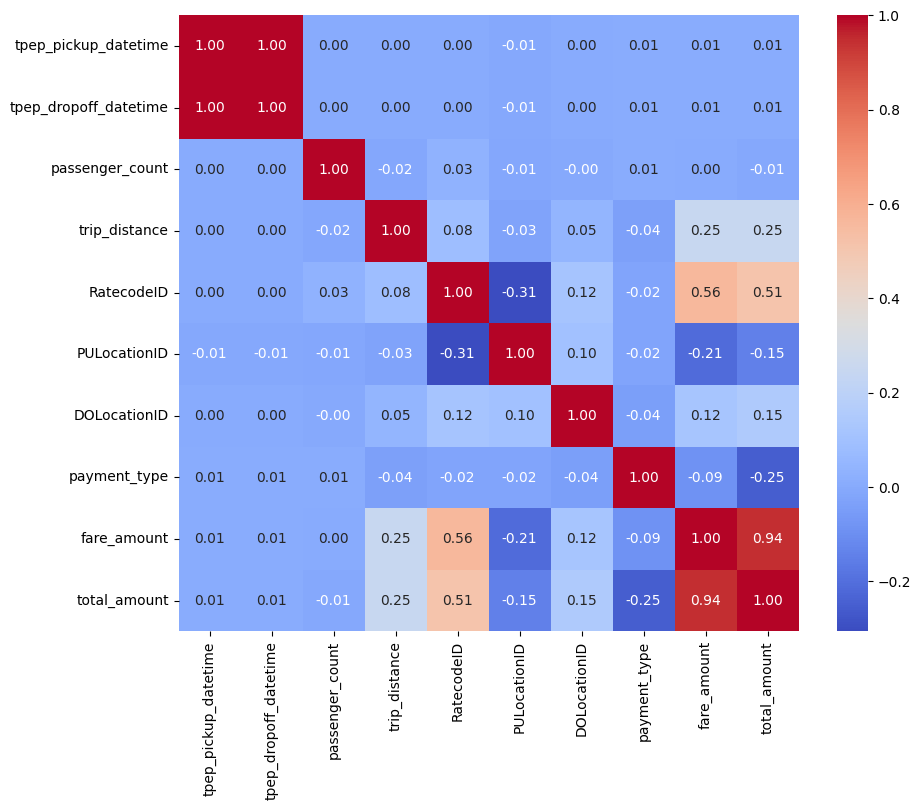

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapa de calor para ver correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Como es de esperar, hay una fuerte relación entre la hora del inicio del viaje y la hora del fin. También existe una relación marcada entre el precio del viaje y el aeropuerto al que se viaja.

Duración del viaje:
Se crea la columna trip_duration para calcular laduración del viaje y trabajar directamente sobre esta misma.

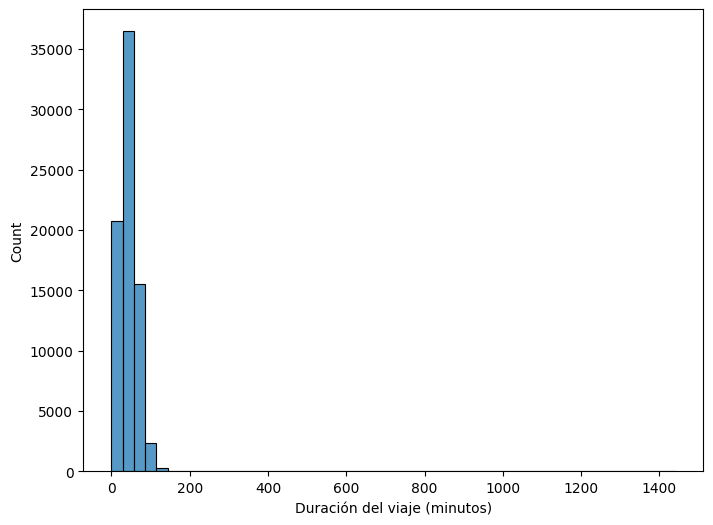

In [11]:
df2['trip_duration'] = (df2['tpep_dropoff_datetime'] - df2['tpep_pickup_datetime']).dt.total_seconds() / 60  # en minutos

# Distribución de la duración de los viajes
plt.figure(figsize=(8, 6))
sns.histplot(df2['trip_duration'], bins=50)
plt.xlabel('Duración del viaje (minutos)')
plt.show()

Se puede visualizar que predomina la corta duración en los viajes.

In [12]:
# Filtrar valores irreales (por ejemplo, viajes de 0 km, duración negativa, montos negativos)
df2 = df2[(df2['trip_distance'] > 0) & (df2['trip_duration'] > 0) & (df2['total_amount'] > 0)]

Relación entre distancia y cantidad total

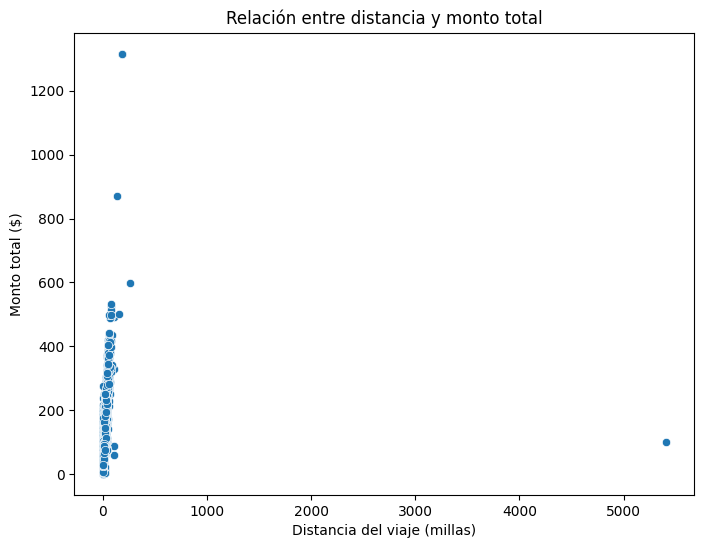

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='trip_distance', y='total_amount')
plt.xlabel('Distancia del viaje (millas)')
plt.ylabel('Monto total ($)')
plt.title('Relación entre distancia y monto total')
plt.show()


Análisis de outliers

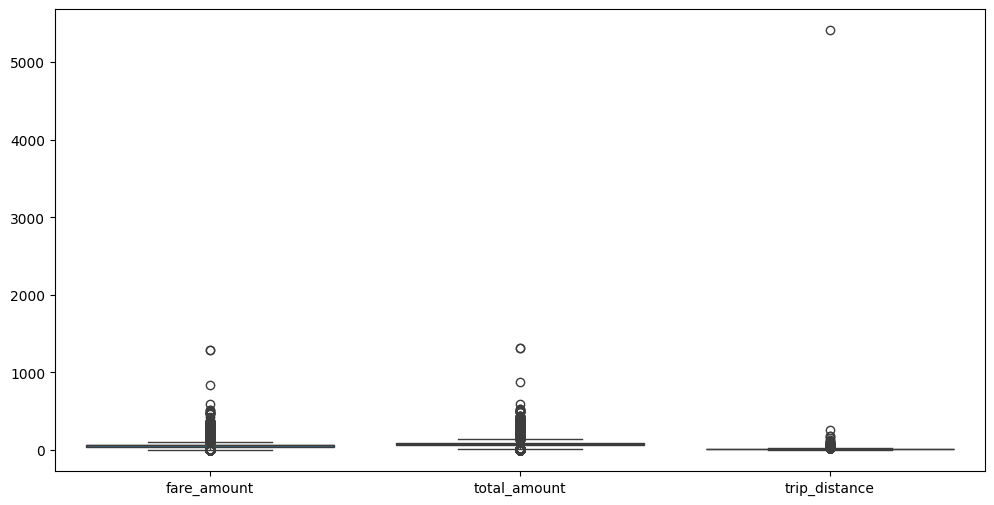

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2[['fare_amount', 'total_amount', 'trip_distance']])
plt.show()


La cantidad de outliers entre los valores no es mayor, pero se los elimina para que no afecte al funcionamiento del modelo.

In [15]:
# Se define una función para eliminar outliers usando el método IQR
def remove_outliers_iqr(df2, column):
    Q1 = df2[column].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df2[column].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango intercuartílico

    # Se definen los límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrado de  datos dentro de los límites
    filtered_df2 = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]
    return filtered_df2

# Aplicar la función para las columnas relevantes
df2 = remove_outliers_iqr(df2, 'total_amount')
df2 = remove_outliers_iqr(df2, 'trip_distance')
df2 = remove_outliers_iqr(df2, 'trip_duration')


In [16]:
# Eliminar filas con 'total_amount' mayores a 500 y menores a 0
df2 = df2[(df2['total_amount'] > 0) & (df2['total_amount'] < 500)]

# Eliminar filas con 'trip_distance' mayores a 50
df2 = df2[df2['trip_distance'] < 50]

# Eliminar filas con 'trip_duration' mayores a 120 minutos
df2 = df2[df2['trip_duration'] < 120]


Se hace la división de datos para el entrenamiento.

In [17]:
from sklearn.model_selection import train_test_split

# Variables independientes (X) y dependiente (y)
X = df2[['trip_distance', 'trip_duration']]
y = df2['total_amount']

# Dividir el conjunto en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.linear_model import LinearRegression

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)



Para que el modelo sea más preciso,se escalan los datos.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
# Evaluación del modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = model.score(X_test, y_test)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 13.606129939404278
R²: 0.6244188410611484


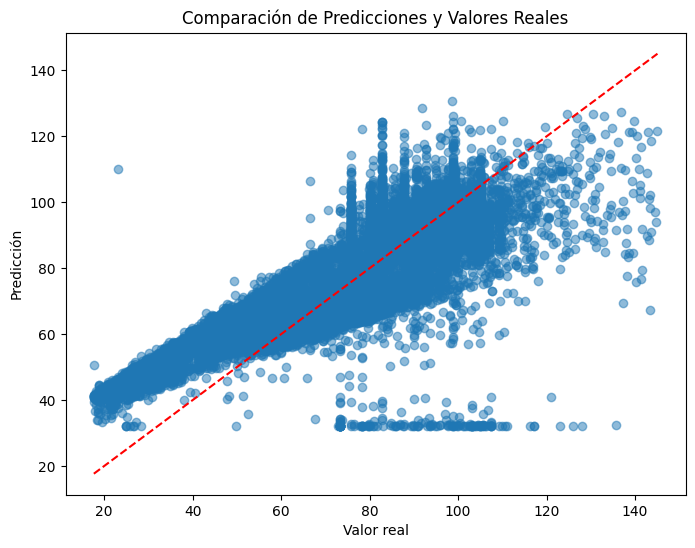

In [21]:
# Comparación entre las predicciones con los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Comparación de Predicciones y Valores Reales')
plt.show()


Se puede observar que el modelo se aproxima en buena parte a los valores reales.

Modelo alternativo 1

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = rf_model.score(X_test, y_test)

print(f"RMSE (Random Forest): {rmse_rf}")
print(f"R² (Random Forest): {r2_rf}")


RMSE (Random Forest): 10.91949230922895
R² (Random Forest): 0.7580979978723209


Con un modelo más eficaz como el de Random Forest el Coficiente de Determinación se aproxima más al valor de 1, por lo que es va a ser más preciso a la hora de predecir.

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"RMSE promedio con validación cruzada: {rmse_scores.mean()}")


RMSE promedio con validación cruzada: 13.33836379460406


In [24]:
# Comparar las predicciones con los valores reales
resultados = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
print(resultados.head(10))  # Mostrar las primeras 10 predicciones


        Real  Predicción
34694  84.69   87.730429
13577  95.09  108.864746
12214  71.85   77.360726
7585   87.11   85.281631
15674  62.15   60.068591
58497  50.09   56.993422
1984   97.69   98.055943
41155  33.85   53.761369
38188  69.84   64.375669
25541  60.19   58.646918


Modelo de disponibilidad de autos compartidos

In [25]:
# Extraer características temporales
df2['pickup_hour'] = df2['tpep_pickup_datetime'].dt.hour
df2['pickup_day_of_week'] = df2['tpep_pickup_datetime'].dt.dayofweek
df2['dropoff_hour'] = df2['tpep_dropoff_datetime'].dt.hour
df2['dropoff_day_of_week'] = df2['tpep_dropoff_datetime'].dt.dayofweek


In [26]:
# Variable objetivo (1 si el auto es compartido, 0 si no lo es)
df2['shared_ride'] = df2['passenger_count'].apply(lambda x: 1 if x > 1 else 0)


In [27]:
# Seleccionar características
features = ['PULocationID', 'DOLocationID', 'pickup_hour', 'pickup_day_of_week', 'trip_distance', 'RatecodeID', 'payment_type']
X = df2[features]
y = df2['shared_ride']


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [29]:
from sklearn.preprocessing import StandardScaler

# Normalizar solo las características continuas
scaler = StandardScaler()
continuous_features = ['trip_distance', 'fare_amount', 'total_amount', 'trip_duration']
df2[continuous_features] = scaler.fit_transform(df2[continuous_features])

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar el modelo
clf = RandomForestClassifier()

# Entrenar el modelo
clf.fit(X_train, y_train)


RandomForestClassifier()

In [31]:
from sklearn.metrics import accuracy_score

# Hacer predicciones
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')


Precisión del modelo: 100.00%


In [32]:
# Filtrar los datos para que solo incluya viajes con 2 o 3 pasajeros
df2_filtered = df2[(df2['passenger_count'] == 2) | (df2['passenger_count'] == 3)]

# Verificar la distribución de pasajeros después del filtro
print(df2_filtered['passenger_count'].value_counts())


passenger_count
2.0    49391
3.0    10791
Name: count, dtype: int64


In [33]:
# Definir las características y la variable objetivo
X_filtered = df2_filtered[features]  # Asegúrate de tener las características definidas
y_filtered = df2_filtered['shared_ride']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

# Entrenar el modelo con los datos filtrados
clf_filtered = RandomForestClassifier()
clf_filtered.fit(X_train_filtered, y_train_filtered)

# Evaluar el modelo
y_pred_filtered = clf_filtered.predict(X_test_filtered)
accuracy_filtered = accuracy_score(y_test_filtered, y_pred_filtered)

print(f'Precisión del modelo con pasajeros filtrados (2 o 3 pasajeros): {accuracy_filtered * 100:.2f}%')


Precisión del modelo con pasajeros filtrados (2 o 3 pasajeros): 100.00%


In [1]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Suponiendo que tienes tu modelo entrenado
clf_filtered = RandomForestClassifier()

# Entrena tu modelo aquí

# Guardar el modelo con pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(clf_filtered, file)
